<a href="https://colab.research.google.com/github/hd77alu/pca-ml/blob/main/PCA_Formative_2%5BPeer_Pair_Number%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

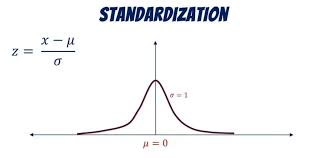


In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data preprocessing
# Load the dataset
data = pd.read_csv('africa-co2-emissions.csv')

# Display basic info
print("data Shape:", data.shape)
print(data.head())

data Shape: (1134, 20)
   Country       Sub-Region Code  Year  Population  GDP PER CAPITA (USD)  \
0  Algeria  Northern Africa  DZA  2000    30774621               1780.38   
1  Algeria  Northern Africa  DZA  2001    31200985               1754.58   
2  Algeria  Northern Africa  DZA  2002    31624696               1794.81   
3  Algeria  Northern Africa  DZA  2003    32055883               2117.05   
4  Algeria  Northern Africa  DZA  2004    32510186               2624.80   

   GDP PER CAPITA PPP (USD)  Area (Km2)  Transportation (Mt)  \
0                   8510.36     2381741                16.85   
1                   8840.67     2381741                17.04   
2                   9354.22     2381741                19.36   
3                  10088.09     2381741                21.76   
4                  10653.34     2381741                22.03   

   Total CO2 Emission including LUCF (Mt)  \
0                                   80.62   
1                                   76.24   


In [3]:
# Select only numeric columns for imputation
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_numeric = data[numeric_columns].copy()

# Fill missing values with column mean
for col in data_numeric.columns:
    col_mean = np.nanmean(data_numeric[col])
    data_numeric[col] = np.where(np.isnan(data_numeric[col]), col_mean, data_numeric[col])

print("\nNumeric data after imputation:", data_numeric.shape)
print(data_numeric.head())



Numeric data after imputation: (1134, 17)
     Year  Population  GDP PER CAPITA (USD)  GDP PER CAPITA PPP (USD)  \
0  2000.0  30774621.0               1780.38                   8510.36   
1  2001.0  31200985.0               1754.58                   8840.67   
2  2002.0  31624696.0               1794.81                   9354.22   
3  2003.0  32055883.0               2117.05                  10088.09   
4  2004.0  32510186.0               2624.80                  10653.34   

   Area (Km2)  Transportation (Mt)  Total CO2 Emission including LUCF (Mt)  \
0   2381741.0                16.85                                   80.62   
1   2381741.0                17.04                                   76.24   
2   2381741.0                19.36                                   80.00   
3   2381741.0                21.76                                   85.78   
4   2381741.0                22.03                                   87.09   

   Total CO2 Emission excluding LUCF (Mt)  Other 

In [4]:
# Calculate mean for each column
data_mean = np.mean(data_numeric, axis=0)

# Calculate standard deviation for each column
data_std = np.std(data_numeric, axis=0)

# Step 1: Load and Standardize the data (use of numpy only allowed)
# Standardization formula: Z = (X - μ) / σ (X = original data, μ = mean of the data, σ = standard deviation of the data)
standardized_data = (data_numeric - data_mean) / data_std # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation

# Convert to DataFrame for better visualization
standardized_data = pd.DataFrame(standardized_data, columns=data_numeric.columns)

standardized_data[:5]  # Display the first few rows of standardized data

,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,-1.651446,0.383179,-0.149799,0.581034,3.051681,1.107140,0.442343,0.952901,-0.367036,0.465385,-0.297089,0.942695,2.373979,0.936551,0.520233,0.639938,1.840527
1,-1.486301,0.398001,-0.158590,0.637414,3.051681,1.124762,0.393140,0.930378,-0.367036,0.476982,-0.341680,0.935647,1.700219,0.913674,0.547163,0.650549,1.887269
2,-1.321157,0.412731,-0.144882,0.725072,3.051681,1.339942,0.435378,0.990708,-0.367036,0.524660,-0.341680,1.037845,1.313215,0.971199,0.601545,0.751350,1.971403
3,-1.156012,0.427721,-0.035084,0.850336,3.051681,1.562542,0.500309,1.083856,-0.367036,0.574914,-0.341680,1.027273,1.772491,1.067515,0.608082,0.602800,2.156032
4,-0.990867,0.443514,0.137924,0.946819,3.051681,1.587584,0.515025,1.104771,-0.367036,0.714081,-0.341680,1.333867,1.551013,1.074809,0.587688,0.761961,2.352345


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.
print(1)


In [5]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data.T)  # Calculate covariance matrix
print("Covariance Matrix Shape:", cov_matrix.shape)
print(cov_matrix[:5, :5])

Covariance Matrix Shape: (17, 17)
[[ 1.00088261e+00  1.05901241e-01  1.58718195e-01  1.26239862e-01
   1.56783481e-18]
 [ 1.05901241e-01  1.00088261e+00 -1.18302546e-01 -8.36151244e-02
   4.51361803e-01]
 [ 1.58718195e-01 -1.18302546e-01  1.00088261e+00  9.48285418e-01
   6.88665850e-03]
 [ 1.26239862e-01 -8.36151244e-02  9.48285418e-01  1.00088261e+00
   9.26893000e-02]
 [ 1.56783481e-18  4.51361803e-01  6.88665850e-03  9.26893000e-02
   1.00088261e+00]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [6]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition

print("Eigenvalues:", eigenvalues[:5])
print("Eigenvectors:", eigenvectors[:5, :5])

Eigenvalues: [8.71470887 2.30139754 1.61698778 1.3972831  1.01195018]
Eigenvectors: [[ 0.0272512  -0.05937115  0.22322015  0.10346605 -0.90583973]
 [ 0.19006492  0.36537027  0.02501156  0.35931375 -0.1050316 ]
 [ 0.08496979 -0.45649717  0.48354359  0.15074409  0.11828836]
 [ 0.10705003 -0.4435989   0.46407068  0.19024863  0.1467169 ]
 [ 0.14862395  0.31529458  0.31462153  0.08557214  0.16726558]]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [7]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]  # Apply sorting to eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Apply sorting to eigenvectors

# Calculate the percentage of explained variance for each PC
individual_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(individual_variance_ratio)

print("Top 5 Eigenvalues:", sorted_eigenvalues[:5])
print("\nTop 7 principle components:")
for i in range(min(7, len(individual_variance_ratio))):
    print(f"  PC{i+1}: {individual_variance_ratio[i]:.4f} ({individual_variance_ratio[i]*100:.2f}%)")

print("\nCumulative Variance (top 5 components):")
for i in range(min(5, len(cumulative_variance_ratio))):
    print(f"  PC1-PC{i+1}: {cumulative_variance_ratio[i]:.4f} ({cumulative_variance_ratio[i]*100:.2f}%)")

Top 5 Eigenvalues: [8.71470887 2.30139754 1.61698778 1.3972831  1.01195018]

Top 7 principle components:
  PC1: 0.5122 (51.22%)
  PC2: 0.1353 (13.53%)
  PC3: 0.0950 (9.50%)
  PC4: 0.0821 (8.21%)
  PC5: 0.0595 (5.95%)
  PC6: 0.0380 (3.80%)
  PC7: 0.0307 (3.07%)

Cumulative Variance (top 5 components):
  PC1-PC1: 0.5122 (51.22%)
  PC1-PC2: 0.6474 (64.74%)
  PC1-PC3: 0.7425 (74.25%)
  PC1-PC4: 0.8246 (82.46%)
  PC1-PC5: 0.8841 (88.41%)


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [8]:
# Step 6: Project Data onto Principal Components
num_components = 5  # Keep 5 principal components (88.41% variance)
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])  # Matrix multiplication

reduced_data[:5]

array([[2.92018916, 1.07359512, 0.00856887, 1.94549321, 2.55105922],
       [2.90933583, 0.91817805, 0.1010119 , 1.52757293, 2.24289597],
       [3.14257776, 0.81271281, 0.19023066, 1.31962182, 2.00024138],
       [3.36961971, 0.77866862, 0.27180131, 1.73336091, 1.97951328],
       [3.63865522, 0.60760745, 0.39494189, 1.67860368, 1.77056321]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [9]:
# Step 7: Output the Reduced Data

# Convert to DataFrame for better visualization
reduced_data = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_components)])
print(f'Reduced Data Shape: {reduced_data.shape}')
reduced_data[:5]

Reduced Data Shape: (1134, 5)


,PC1,PC2,PC3,PC4,PC5
0,2.920189,1.073595,0.008569,1.945493,2.551059
1,2.909336,0.918178,0.101012,1.527573,2.242896
2,3.142578,0.812713,0.190231,1.319622,2.000241
3,3.369620,0.778669,0.271801,1.733361,1.979513
4,3.638655,0.607607,0.394942,1.678604,1.770563


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

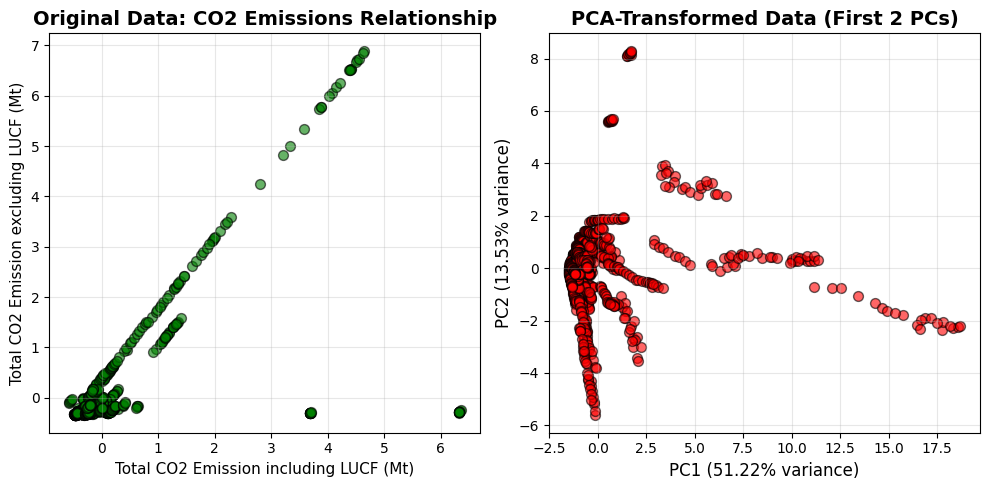

Original dimensions: (1134, 17)
Reduced dimensions: (1134, 5)
Variance retained: 88.41%
Dimensionality reduction: 70.6%


In [10]:
# Step 8: Visualize Before and After PCA

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: Original data - Total CO2 Emissions
axes[0].scatter(standardized_data.iloc[:, 6], standardized_data.iloc[:, 7], 
                alpha=0.6, c='green', edgecolors='k', s=50)
axes[0].set_xlabel(f'{standardized_data.columns[6]}', fontsize=11)
axes[0].set_ylabel(f'{standardized_data.columns[7]}', fontsize=11)
axes[0].set_title('Original Data: CO2 Emissions Relationship', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Reduced data after PCA (first two principal components)
axes[1].scatter(reduced_data['PC1'], reduced_data['PC2'], 
                alpha=0.6, c='red', edgecolors='k', s=50)
axes[1].set_xlabel('PC1 (51.22% variance)', fontsize=12)
axes[1].set_ylabel('PC2 (13.53% variance)', fontsize=12)
axes[1].set_title('PCA-Transformed Data (First 2 PCs)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Original dimensions: {standardized_data.shape}")
print(f"Reduced dimensions: {reduced_data.shape}")
print(f"Variance retained: 88.41%")
print(f"Dimensionality reduction: {((17-5)/17)*100:.1f}%")